# Data Science - Assignment 2

## Ather Fawaz [17L-4004]
## Muhammad Wasiq Malik [17L-6315]

## Part 1: Logistic Regression

In [1]:
import copy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:

def normalize_data(array):
    mean = np.mean(array, axis=0)
    std = np.std(array, axis=0)
    return ((array - mean) / std), mean, std


def cost_function(X, Y, theta):
    samples = Y.shape[0]
    h = sigmoid(np.dot(X, theta))
    cost = (1 / samples) * np.sum(((np.transpose(-Y).dot(np.log(h))) -
                                   (np.transpose(1 - Y).dot(np.log(1 - h)))))
    return cost


def gradient_descent(X, Y, theta, learning_rate, iterations):
    samples = Y.shape[0]
    cost = 0
    for i in range(iterations):
        h = sigmoid(np.dot(X, theta))
        theta = theta - (learning_rate / samples) * (X.transpose().dot(h - Y))
        cost = cost_function(X, Y, theta)
    return theta, cost


def sigmoid(Z):
    Z = np.array(Z)
    return (1 / (1 + np.exp(-Z)))


def fetch_dataset(file_name, delimiter=','):
    dataset = pd.read_csv(file_name, delimiter, header=None)
    Y = dataset.iloc[:, -1:]
    X = dataset.iloc[:, : -1]
    return np.array(X), np.array(Y)


def plot_data(X, Y, predicted=False):
    Y = np.array(np.transpose(Y))
    Y = Y.flatten()
    class_a = Y == 1
    class_b = Y == 0
    if predicted:
        plt.plot(X[class_a, 1], X[class_a, 2], '+')
        plt.plot(X[class_b, 1], X[class_b, 2], 'o')
    else:
        plt.plot(X[class_a, 0], X[class_a, 1], '+')
        plt.plot(X[class_b, 0], X[class_b, 1], 'o')
    plt.title('Exam Scores')
    plt.xlabel('Exam 1 Score')
    plt.ylabel('Exam 2 Score')
    plt.legend(['Admitted', 'Not Admitted'], loc='upper right')
    if not predicted:
        plt.show()


def predict(features, theta, x_mean, x_std):
    features = np.subtract(features, x_mean) / x_std
    features = np.hstack([np.ones(1), features])
    return sigmoid(np.dot(features, theta))


def plot_decision_boundary(X, Y, theta):
    plot_data(X, Y, predicted=True)
    plot_x = np.array([np.min(X[:, 1]) - 2, np.max(X[:, 1]) + 2])
    plot_y = (-1. / theta[2]) * (theta[1] * plot_x + theta[0])
    plt.plot(plot_x, plot_y)
    plt.legend(['Admitted', 'Not admitted',
                'Decision Boundary'], loc='upper right')
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.show()

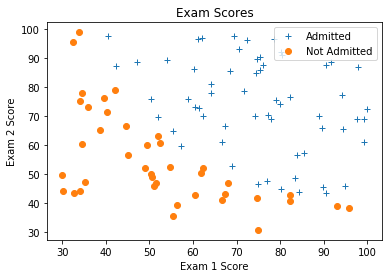

Theta:  [[1.71669387]
 [3.9890389 ]
 [3.72150901]]
Cost:  0.20349778935367965
For a student with a score of 45 in exam 1 and 85 in exam 2, the probability of admission is:  [0.77604009]


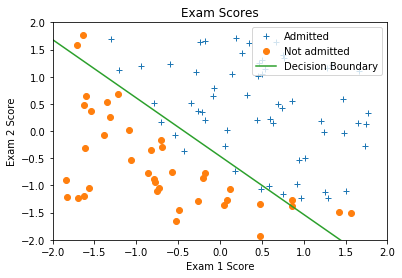

In [3]:
def main():
    # fetch dataset
    X, Y = fetch_dataset('ex2data1.txt')
    X_original = copy.deepcopy(X)

    sample_count = len(Y)
    feature_count = X.shape[1]

    # plotting data
    plot_data(X, Y)

    # thetas
    X, x_mean, x_std = normalize_data(X)
    X = np.hstack([np.ones((sample_count, 1)), X])
    theta = np.random.rand(feature_count + 1, 1)

    # hyperparameters
    learning_rate = 0.5
    iterations = 2000

    # running gradient descent
    theta, cost = gradient_descent(X, Y, theta, learning_rate, iterations)

    print('Theta: ', theta)
    print('Cost: ', cost)

    # calculating for a given value
    features = np.array([45, 85])
    prediction = predict(features, theta, x_mean, x_std)
    print('For a student with a score of 45 in exam 1 and 85 in exam 2, the probability of admission is: ', prediction)

    # plot decision boundary
    plot_decision_boundary(X, Y, theta)


if __name__ == "__main__":
    main()

## Part 2: Regularized Linear Regression

In [4]:
import copy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
def feature_mapping(X1, X2, degree):
    X1 = np.array(X1)
    X2 = np.array(X2)
    dims = X1.ndim

    result = [np.ones(X1.shape[0])] if dims > 0 else [np.ones(1)]

    for i in range(1, degree + 1):
        for j in range(i + 1):
            result.append((X1 ** (i - j)) * (X2 ** j))

    return np.stack(result, axis=1) if dims > 0 else np.array(result)


def plotData(X, Y):
    # Here is the grid range
    Y = np.array(np.transpose(Y))
    Y = Y.flatten()
    class_a = Y == 1
    class_b = Y == 0
    plt.plot(X[class_a, 0], X[class_a, 1], '+')
    plt.plot(X[class_b, 0], X[class_b, 1], 'o')
    plt.title('Microchips')
    plt.xlabel('Microchip Test 1')
    plt.ylabel('Microchip Test 2')
    plt.legend(['y = 1', 'y = 0', 'Decision Boundary'], loc='upper right')


def plot_decision_boundary(theta, X, Y):
    # generating grid
    theta = np.array(theta)
    plotData(X, Y)
    x_axis = np.linspace(-1, 1.5, 50)
    y_axis = np.linspace(-1, 1.5, 50)

    # calculating z axis
    z = np.zeros((x_axis.size, y_axis.size))
    for i, x1 in enumerate(x_axis):
        for j, x2 in enumerate(y_axis):
            z[i, j] = np.dot(feature_mapping(x1, x2, degree=6), theta)

    # Plot z = 0
    plt.contour(x_axis, y_axis, np.transpose(
        z), levels=[0], linewidths=2, colors='b')
    levels = [np.min(z), 0, np.max(z)]
    if not (np.min(z) < 0 < np.max(z)):
        levels.sort()
    plt.contourf(x_axis, y_axis, np.transpose(z), levels=levels,
                 cmap='Blues', alpha=0.5)
    plt.show()


def normalize_data(array):
    mean = np.mean(array, axis=0)
    std = np.std(array, axis=0)
    return ((array - mean) / std), mean, std


def regularized_cost_function(X, Y, theta, lambda_term):
    samples = Y.shape[0]
    h = sigmoid(np.dot(X, theta))
    cost = (1 / samples) * np.sum(((np.transpose(-Y).dot(np.log(h))) -
                                   (np.transpose(1 - Y).dot(np.log(1 - h)))))
    cost += (lambda_term / samples) * np.sum(np.square(theta[1:, :]))

    return cost


def gradient_descent(X, Y, theta, learning_rate, iterations, lambda_term):
    samples = Y.shape[0]
    cost = 0
    for i in range(iterations):
        h = sigmoid(np.dot(X, theta))
        gradient = (1 / samples) * (X.transpose().dot(h - Y))
        theta[0, 0] = theta[0, 0] - learning_rate * gradient[0, 0]
        theta[1:, :] = (theta[1:, :] - learning_rate *
                        (gradient[1:, :] + (lambda_term / samples * theta[1:, :])))
        cost = regularized_cost_function(X, Y, theta, lambda_term)
    return theta, cost


def sigmoid(Z):
    Z = np.array(Z)
    result = (1 / (1 + np.exp(-Z)))
    return result


def fetch_dataset(file_name, delimiter=','):
    dataset = pd.read_csv(file_name, delimiter, header=None)
    Y = dataset.iloc[:, -1:]
    X = dataset.iloc[:, : -1]
    return np.array(X), np.array(Y)


def plot_data(X, Y, predicted=None):
    Y = np.array(np.transpose(Y))
    Y = Y.flatten()
    class_a = Y == 1
    class_b = Y == 0
    plt.plot(X[class_a, 0], X[class_a, 1], '+')
    plt.plot(X[class_b, 0], X[class_b, 1], 'o')
    plt.title('Microchips')
    plt.xlabel('Microchip Test 1')
    plt.ylabel('Microchip Test 2')
    plt.legend(['y = 1', 'y = 0'], loc='upper right')
    plt.show()


def predict(features, theta, x_mean, x_std):
    features = np.subtract(features, x_mean) / x_std
    features = np.hstack([np.ones(1), features])
    return sigmoid(np.dot(features, theta))


def logistic_regression(X, Y, X_original, theta, reg, lr, it):

    print('HYPERPARAMETERS:')
    print('Iterations: ', it)
    print('Learning Rate: ', lr)
    print('Regularization Parameter: ', reg)
    print()

    # running gradient descent
    theta, cost = gradient_descent(
        X, Y, theta, lr, it, reg)

    predictions = np.round(sigmoid(X.dot(theta)))
    acc = np.mean(predictions == Y) * 100
    print(f'Accuracy: {acc:.2f}%')
    plot_decision_boundary(theta, X_original, Y)

HYPERPARAMETERS:
Iterations:  1000
Learning Rate:  0.1
Regularization Parameter:  1

Accuracy: 83.05%


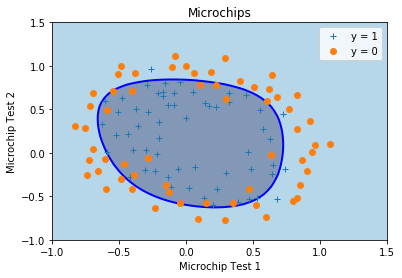

HYPERPARAMETERS:
Iterations:  5000
Learning Rate:  0.01
Regularization Parameter:  100

Accuracy: 61.02%


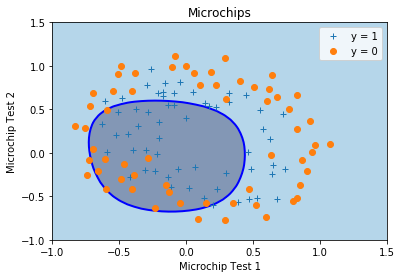

HYPERPARAMETERS:
Iterations:  1000000
Learning Rate:  1
Regularization Parameter:  0

Accuracy: 87.29%


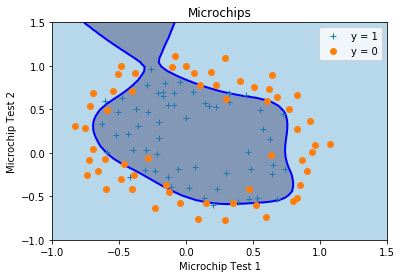

In [6]:
def main():
    # fetch dataset
    X, Y = fetch_dataset('ex2data2.txt')
    X_original = copy.deepcopy(X)

    # feature mapping
    X = feature_mapping(
        np.array(X[:, 0]),
        np.array(X[:, 1]), degree=6)

    # norms
    feature_count = X.shape[1]
    theta = np.zeros((feature_count, 1))

    # best fit
    logistic_regression(X, Y, X_original, theta, reg=1, lr=0.1, it=1000)
    # under fit
    logistic_regression(X, Y, X_original, theta, reg=100, lr=0.01, it=5000)
    # over fit
    logistic_regression(X, Y, X_original, theta, reg=0, lr=1, it=1000000)


if __name__ == "__main__":
    main()